# Séries temporais com *Pycaret*

Aplicação do novo módulo da biblioteca *Pycaret* para modelagem e previsões de séries temporais. Em um projeto anterior foi usado o módulo de regressão dessa mesma biblioteca, onde nas configurações (*setup*) da geração dos modelos foi inserido *fold_strategy*=*'timeseries'*. Porém mesmo com essa modificação de parâmetros, o módulo não é muito adequado para séries temporais. Com esse novo módulo, foram inseridos os modelos de baseline (*snaive* e *naive*), os convencionais para séries temporais (Suavização exponencial, ARIMA, ETS e AutoARIMA), modelos mais elaborados (*Prophet*, *BATS*, *TBATS* e *Tetha*) e modelos que utilizam modelos clássicos de *machine learning*.


## Instalação da biblioteca com o módulo de séries temporais

In [1]:
pip install pycaret-ts-alpha

     |████████████████████████████████| 430kB 8.2MB/s 
     |████████████████████████████████| 256kB 41.2MB/s 
     |████████████████████████████████| 6.8MB 36.7MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 14.4MB 208kB/s 
     |████████████████████████████████| 1.5MB 36.4MB/s 
     |████████████████████████████████| 1.7MB 28.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.7MB 27.0MB/s 
     |████████████████████████████████| 174kB 56.5MB/s 
     |████████████████████████████████| 276kB 22.6MB/s 
     |████████████████████████████████| 1.4MB 36.4MB/s 
     |████████████████████████████████| 2.0MB 37.1MB/s 
     |████████████████████████████████| 112kB 50.4MB/s

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from pprint import pprint
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

## Importação dos dados

Os dados usados nesse modelo são do *site* *FRED* e tratam de vendas no setor de varejo. A frequência é mensal, a escala dos dados está em milhoes de dólares e vão do ano de 1992 até 2020. Os dados podem ser obtidos [aqui](https://www.kaggle.com/robikscube/hourly-energy-consumption).

In [4]:
vendas= pd.read_csv("MRTSSM7225USN.csv", index_col='DATE')

#esse comando é importante, pois, caso contrário, o setup não irá conseguir aceitá-los.
vendas.index = pd.date_range('1992-01-01', periods=337, freq='M')

## Breve análise dos dados

Primeiras observações dos dados.

In [5]:
vendas.head()

,MRTSSM7225USN
1992-01-31,13325
1992-02-29,13474
1992-03-31,14346
1992-04-30,14065
1992-05-31,15077


Últimas observações dos dados.

In [6]:
vendas.tail()

,MRTSSM7225USN
2019-09-30,53944
2019-10-31,55762
2019-11-30,54039
2019-12-31,57086
2020-01-31,53411


Tipo dos dados da série temporal.

In [7]:
vendas.dtypes
#inteiros

MRTSSM7225USN    int64
dtype: object

Informações sobre a base de dados.

In [8]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 1992-01-31 to 2020-01-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MRTSSM7225USN  337 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


Dimensão da base de dados: 337 observações.

In [9]:
vendas.shape

(337, 1)

Tabela estatística da série temporal.

In [10]:
vendas.describe()

,MRTSSM7225USN
count,337.000000
mean,30624.605341
std,12124.449416
min,13325.000000
25%,20153.000000
50%,29239.000000
75%,38926.000000
max,59318.000000


Gráfico da série mostra a tendência de crescimento global da série e a presença de sazonalidade.

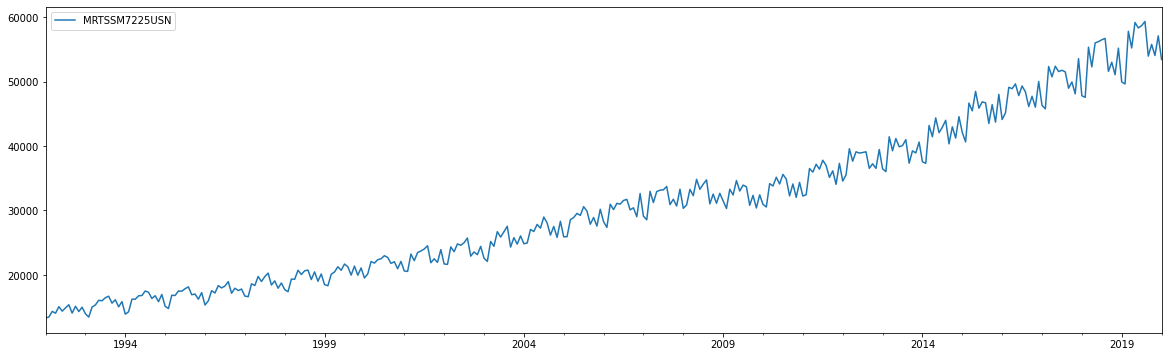

In [11]:
vendas.plot(figsize=(20,6));

## Aplicando *Auto Time Series*

Agora será aplicado a modelagem, onde será inserida a série completa e o número de observações que servirão como dados de validação. Esses dados de validação serão comparados com as previsões geradas pelos modelos.

In [56]:
exp = TimeSeriesExperiment()
exp.setup(vendas, fh=12, fold=3, session_id=42);

,Description,Value
0,session_id,42
1,Original Data,"(337, 1)"
2,Missing Values,False
3,Transformed Train Set,"(325,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


Modelos disponíveis nessa biblioteca.

In [57]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


Nessa etapa serão gerados todos os modelos disponíveis (desde que aplique *turbo*=*false*) e as principais métricas de avaliação de modelos. Os melhores 3 modelos serão inseridos dentro de uma variável.

Conforme abaixo, os melhores modelos são o TBATS, o Prophet e o ETS. 

In [58]:
melhores_modelos_3 = exp.compare_models(exclude=['auto_arima'], n_select=3, turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
tbats,TBATS,875.312,1.30607e+06,0.0169,0.0171,0.7242,75.7433
bats,BATS,884.713,1.26675e+06,0.0171,0.0173,0.738,10.3100
ets,ETS,908.598,1.38729e+06,0.0176,0.0178,0.7472,0.0733
exp_smooth,Exponential Smoothing,962.777,1.49592e+06,0.0187,0.0188,0.731,0.1367
prophet,Prophet,1243.49,2.28375e+06,0.0242,0.0244,0.5177,0.2467
arima,ARIMA,1307.24,2.59087e+06,0.0254,0.0259,0.4759,0.2933
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1901.64,5.53209e+06,0.0368,0.0377,-0.0895,0.0900
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1901.65,5.53209e+06,0.0368,0.0377,-0.0895,0.0933
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1901.64,5.53208e+06,0.0368,0.0377,-0.0895,0.0933
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1901.65,5.53209e+06,0.0368,0.0377,-0.0895,0.0933


Os três melhores modelos.

In [59]:
melhores_modelos_3

[TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
       n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
       use_box_cox=True, use_damped_trend=None, use_trend=None),
 BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None),
 AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add')]

## Avaliando os modelos separadamente

Modelo *TBATS*.

In [60]:
modelo = exp.create_model("tbats")
modelo

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,805.6829,9.022847e+05,0.0168,0.0169,0.6264
1,2017-01,725.1173,1.004930e+06,0.0140,0.0142,0.7917
2,2018-01,1095.1364,2.011009e+06,0.0199,0.0202,0.7544
Mean,NaN,875.3122,1.306074e+06,0.0169,0.0171,0.7242
SD,NaN,158.8809,5.002221e+05,0.0024,0.0024,0.0708


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)

Modelo *BATS*.

In [61]:
modelo1 = exp.create_model('bats')
modelo1

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,804.5725,8.561041e+05,0.0168,0.0168,0.6456
1,2017-01,724.4528,8.451812e+05,0.0141,0.0142,0.8248
2,2018-01,1125.1142,2.098957e+06,0.0204,0.0207,0.7436
Mean,NaN,884.7132,1.266748e+06,0.0171,0.0173,0.7380
SD,NaN,173.1074,5.884780e+05,0.0026,0.0027,0.0733


BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)

Modelo *ETS*.

In [62]:
modelo2 = exp.create_model('ets')
modelo2

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,635.4540,6.318037e+05,0.0134,0.0134,0.7384
1,2017-01,761.4507,7.703644e+05,0.0151,0.0151,0.8403
2,2018-01,1328.8899,2.759705e+06,0.0244,0.0247,0.6629
Mean,NaN,908.5982,1.387291e+06,0.0176,0.0178,0.7472
SD,NaN,301.6097,9.720904e+05,0.0048,0.0050,0.0727


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')

Definindo as variáveis de treino e de teste (ou validação).

In [66]:
y_treino = exp.get_config("y_train")
y_teste = exp.get_config("y_test")

## Gerando as previsões

### Gerando as previsões do modelo *TBATS*

In [67]:
y_predito = exp.predict_model(modelo)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,796.9033,1054.878,0.0139,0.0141,0.858


Plotando as previsões, a série de validação e os dados de treino.

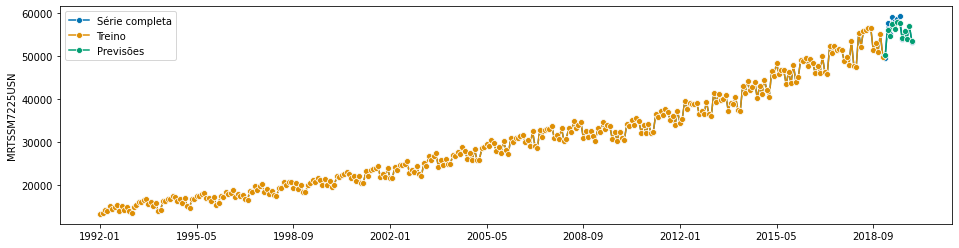

In [68]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

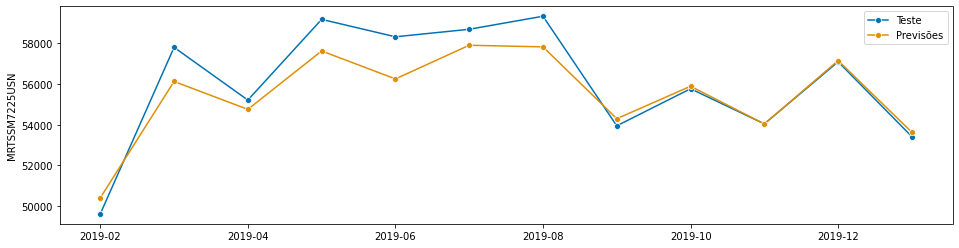

In [69]:
plot_series(y_teste, y_predito, labels=['Teste', 'Previsões']);

### Gerando as previsões para o *BATS*

In [70]:
y_predito1 = exp.predict_model(modelo1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,BATS,1067.0223,1269.9239,0.0187,0.0189,0.7942


Plotando as previsões, a série de validação e os dados de treino.

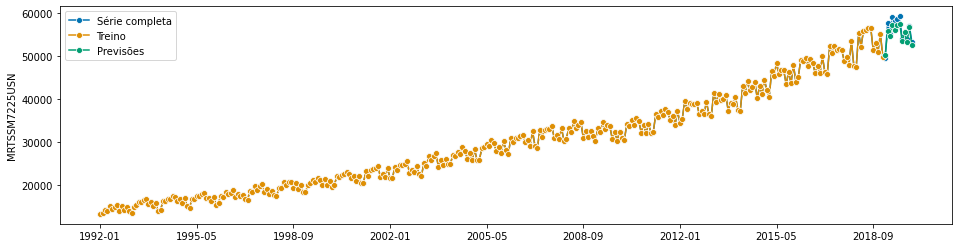

In [71]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito1, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

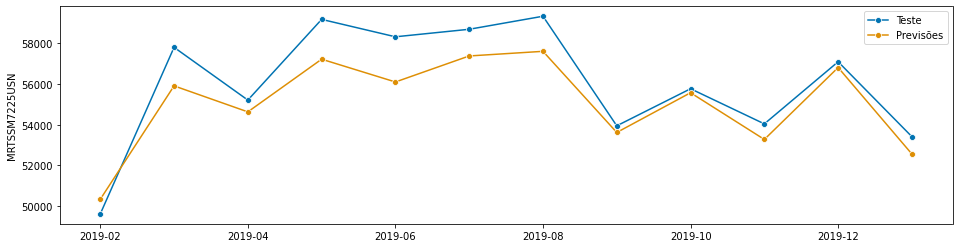

In [72]:
plot_series(y_teste, y_predito1, labels=['Teste', 'Previsões']);

### Gerando as previsões para o modelo *ETS*

In [73]:
y_predito2 = exp.predict_model(modelo2)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,764.1677,886.7823,0.0139,0.0139,0.8997


Plotando as previsões, a série de validação e os dados de treino.

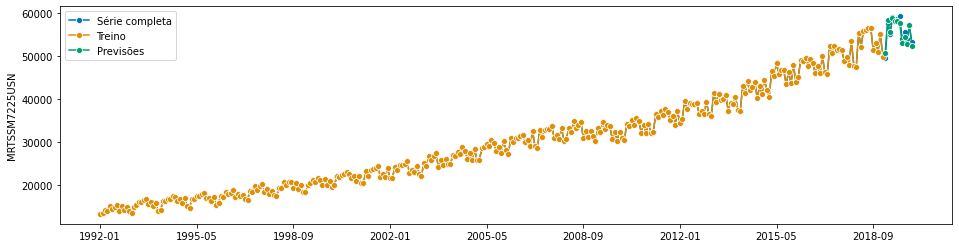

In [74]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito2, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

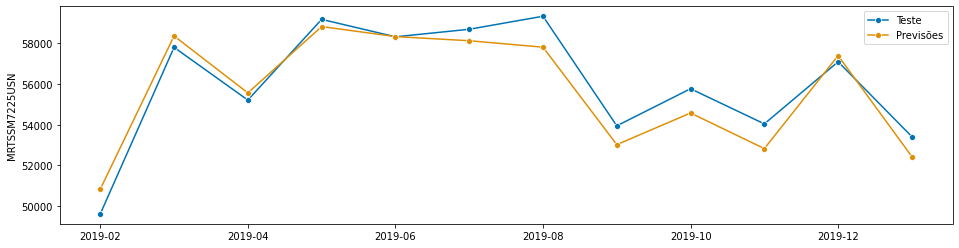

In [75]:
plot_series(y_teste, y_predito2, labels=['Teste', 'Previsões']);

## Realizando o *Tunning* do modelo

Nessa etapa é possível realizar uma busca de parâmetros que possam melhorar o desempenho dos modelos.



### *Tunning TBATS*

In [76]:
modelo_tunado = exp.tune_model(modelo)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,805.6829,9.022847e+05,0.0168,0.0169,0.6264
1,2017-01,725.1173,1.004930e+06,0.0140,0.0142,0.7917
2,2018-01,1095.1364,2.011009e+06,0.0199,0.0202,0.7544
Mean,NaN,875.3122,1.306074e+06,0.0169,0.0171,0.7242
SD,NaN,158.8809,5.002221e+05,0.0024,0.0024,0.0708


Comparando o modelo antes e depois do *tunning*.

In [77]:
print(modelo)
print(modelo_tunado)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)
TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=False, use_trend=True)


### *Tunning BATS*

In [78]:
modelo_tunado1 = exp.tune_model(modelo1)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,804.5725,8.561041e+05,0.0168,0.0168,0.6456
1,2017-01,724.4528,8.451812e+05,0.0141,0.0142,0.8248
2,2018-01,1125.1142,2.098957e+06,0.0204,0.0207,0.7436
Mean,NaN,884.7132,1.266748e+06,0.0171,0.0173,0.7380
SD,NaN,173.1074,5.884780e+05,0.0026,0.0027,0.0733


Comparando os modelos.

In [79]:
print(modelo1)
print(modelo_tunado1)

BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)
BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=False, use_trend=True)


### *Tunning* ETS

Os resultados foram os mesmo do modelo original.

In [80]:
modelo_tunado2 = exp.tune_model(modelo2)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2016-01,635.4540,6.318037e+05,0.0134,0.0134,0.7384
1,2017-01,761.4507,7.703644e+05,0.0151,0.0151,0.8403
2,2018-01,1328.8899,2.759705e+06,0.0244,0.0247,0.6629
Mean,NaN,908.5982,1.387291e+06,0.0176,0.0178,0.7472
SD,NaN,301.6097,9.720904e+05,0.0048,0.0050,0.0727


Os parâmetros são os mesmos.

In [81]:
print(modelo2)
print(modelo_tunado2)

AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')


## Previsões dos modelos tunados

In [84]:
y_predito_tunado = exp.predict_model(modelo_tunado)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,796.9033,1054.878,0.0139,0.0141,0.858


In [85]:
y_predito_tunado1 = exp.predict_model(modelo_tunado1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,BATS,1067.0223,1269.9239,0.0187,0.0189,0.7942


In [86]:
y_predito_tunado2 = exp.predict_model(modelo_tunado2)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,764.1677,886.7823,0.0139,0.0139,0.8997


## Finalizando o modelo

Como o melhor modelo foi o *Prophet* tunado, então esse projeto será finalizado com esse modelo.

In [87]:
modelo_final = exp.finalize_model(modelo_tunado2)

Gerando as previsões para um período de tempo desconhecido.

In [88]:
previsoes = exp.predict_model(modelo_final, verbose=False)

Plotando os dados de originais e as previsões.

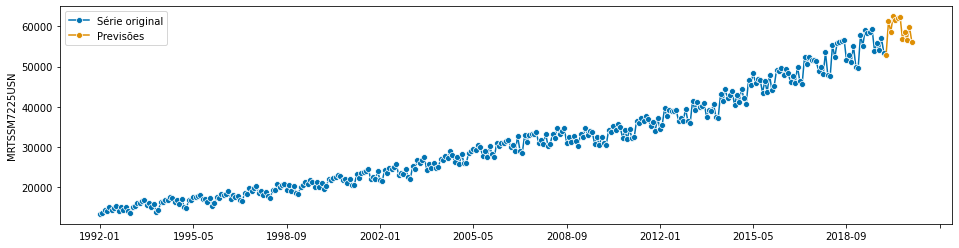

In [89]:
plot_series(vendas['MRTSSM7225USN'], previsoes, labels=['Série original','Previsões']);

## Salvando o modelo

In [90]:
exp.save_model(modelo_final, 'melhor_modelo2', model_only=True)

Transformation Pipeline and Model Successfully Saved


(AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add'), 'melhor_modelo2.pkl')

## Carregando o modelo


In [91]:
modelo_carregado2 = exp.load_model('melhor_modelo2')

Transformation Pipeline and Model Successfully Loaded
